### Motion

A video is simply a sequence of large number of images, binded together one after another, which is basically the idea of motion. One way to track objects over time and detect motion is by extracting feature from one frame of image and observe how it changes over next set of frames. A technique called Optical Flow helps in tracking and detecting motion.

### Optical Flow

Optical flow is used in many tracking and motion analysis applications. It works by assuming two things about image frames. One, that the pixel intensities of an object do not change between consecutive frames and two, that neighboring pixels have similar motion. It then looks at interesting points, like corners or particularly bright pixels, and tracks them from one frame to the next. Tracking a point or a set of points provides information about how fast that point or object is moving and in what direction. This data also allows you to predict where an object will move next.
So you can use optical flow to do things like
hand gesture recognition or to track a certain object like a person or vehicle,
and it's so much more powerful too. 

### Applications of Motion Recognition
Motion recognition can be used to distinguish between behaviors like running versus walking,
and in safety applications by predicting the motion of things and
performing obstacle avoidance like in the case of self-driving cars.
It's even used in eye tracking for virtual reality games and advertising.
So, in many applications,
tracking and motion can add some very valuable information.


### How exactly does optical flow work?

We know that it tries to track points from one image frame to
another based on the intensity levels of points in each image.

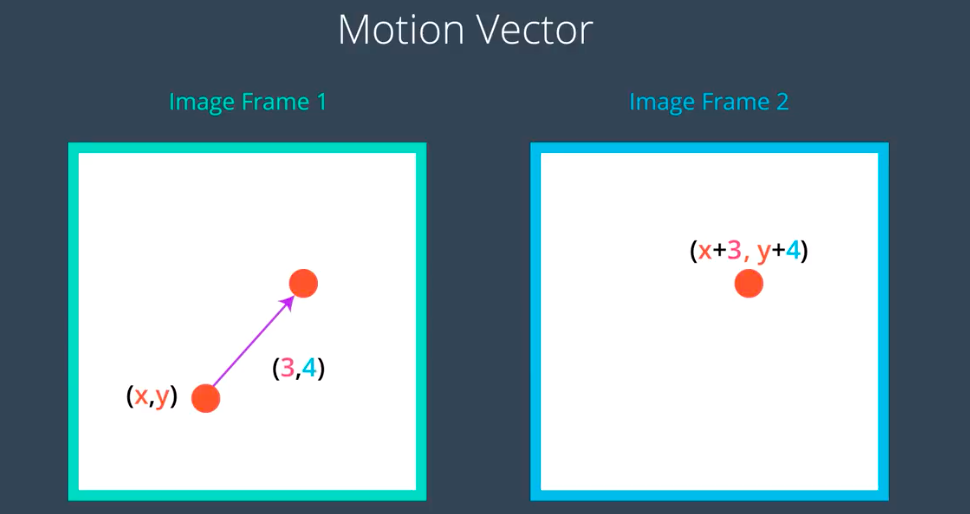

In [1]:
from IPython.display import Image
Image("/Users/mayurjain/Desktop/optical_flow.png")

Let's see this in a simple example.
Say we have two image frames from a video,
and for one point on object in image one,
we want to find out where it is in image two.
Once we do, we can calculate a motion vector that
describes the velocity of this point from the first frame to the next.
The math works like this,
a point in our first image (x,y),
will move some amount from this frame to the next.
It will have moved some distance u horizontally,
and some distance v vertically.
So in the second image frame,
that point will be at the coordinate x plus u and y plus
v. This motion can be described by a motion vector (u, v).
Vector is a quantity that has a magnitude and a direction.


Let's say that a point has moved three pixels to the right, and four pixels up,
then our point (x,y) in the first frame will be
at x plus three y plus four in the second frame.
The motion vector will be (3,4).
The magnitude of any vector in x,y space can be found by the Pythagorean theorem for sides of a triangle.
A^2 + B^2 = C^2.
So in this case, the magnitude of the vector equals
the square root of three squared plus four squared,
that's the square root of 25, which is five.
The orientation of this vector can be found using trigonometry.
Where the angle equals the inverse tangent of four over three,
which is about 53.13 degrees.
Knowing the magnitude and direction of a moving point or a set of moving points,
is all you really need to know to track an object.

A motion vector for a 2D image, has an x and y component (u, v). A motion vector for any point starts with the location of the point as the origin of the vector and it’s destination as the end of the vector (where the arrow point is).

**Vectors**: https://www.mathsisfun.com/algebra/vectors.html

### Brightness Constancy Assumption

Now, optical flow assumes that points in one image frame have
the same intensity pixel value as those same points in the next image frame.
That is optical flow assumes that the color of a surface will stay the same over time.
In practice, this is not a perfect assumption but it's close most of the time.

So in these images, Image Frame 1 and Image Frame 2,
the intensity at the point x,
y in this first image is the same as the intensity in image two at the point x + u,
y + v. So far,
we have treated these as two separate images in x and y space,
but we also know that they're related in time.
How do you think we can mathematically
represent that image one comes right before image two?
To relate image frames in space and time,
we can think about these image frames in another way.
This first image is just the 2D pattern of intensity that happens at time t,
and the second image is the intensity pattern that happens at time t + 1,
one time step later.


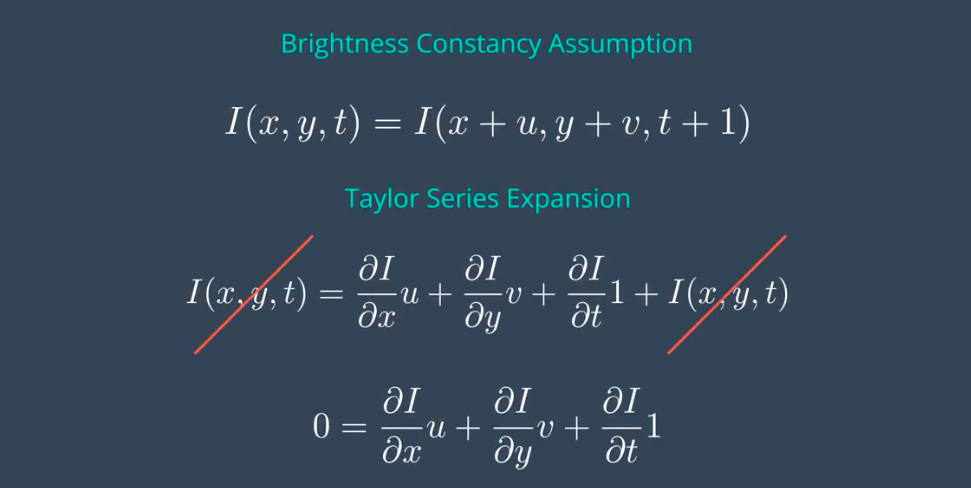

In [2]:
Image("/Users/mayurjain/Desktop/Brightness Constancy Assumption.png")

In this way, we can think of a series of image frames I as
a 3D volume of images with x and y coordinates,
pixel values at each point,
and a depth dimension of time.
We can write this intensity equation as a function of x and y
and t. This equation is known as the brightness constancy assumption.
This function can be broken down into something called a Taylor series expansion,
which represents this intensity function as a summation of terms.
In this case, the terms I calculated as
the derivatives of the intensity with respect to x,
y and t. We can simplify this expansion,
and the result is an equation that relates the motion vector quantities u and
v to the change in image intensity in space and in time,
which are measurable changes.
This is the foundation of how optical flow estimates
the motion vectors for a set of feature points in a video.

### Second Assumption/Constraint

You’ll note that the brightness constancy assumption gives us one equation with two unknowns (u and v), and so we also have to have another constraint; another equation or assumption that we can use to solve this problem.

Recall that in addition to assuming brightness constancy, we also assume that neighboring pixels have similar motion. Mathematically this means that pixels in a local patch have very similar motion vectors. For example, think of a moving person, if you choose to track a collection of points on that person’s face, all of those points should be moving at roughly the same speed. Your nose can’t be moving the opposite way of your chin.

This means that I shouldn’t get big changes in the flow vectors (u, v), and optical flow uses this idea of motion smoothness to estimate u and v for any point.



In [3]:
import numpy as np
import matplotlib.image as mpimg  # for reading in images
import matplotlib.pyplot as plt
import cv2  # computer vision library
%matplotlib inline

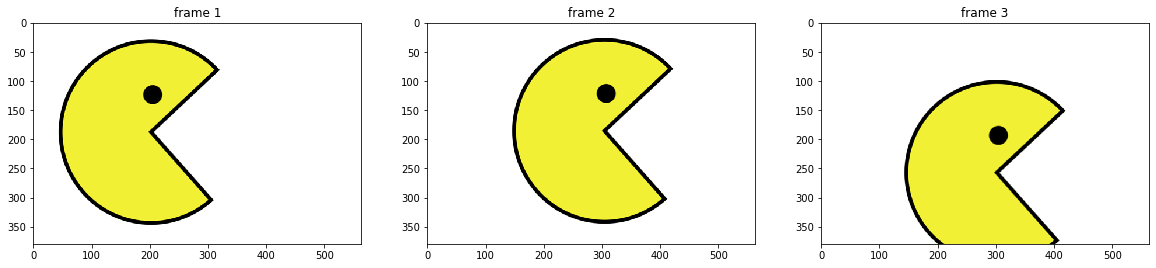

In [32]:
# Read in the image frames
frame_1 = cv2.imread('/Users/mayurjain/Desktop/cv_images/pacman_1.png')
frame_2 = cv2.imread('/Users/mayurjain/Desktop/cv_images/pacman_2.png')
frame_3 = cv2.imread('/Users/mayurjain/Desktop/cv_images/pacman_3.png')

# convert to RGB
frame_1 = cv2.cvtColor(frame_1, cv2.COLOR_BGR2RGB)
frame_2 = cv2.cvtColor(frame_2, cv2.COLOR_BGR2RGB)
frame_3 = cv2.cvtColor(frame_3, cv2.COLOR_BGR2RGB)


# Visualize the individual color channels
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))
ax1.set_title('frame 1')
ax1.imshow(frame_1)
ax2.set_title('frame 2')
ax2.imshow(frame_2)
ax3.set_title('frame 3')
ax3.imshow(frame_3)

### Finding Points to Track

Befor optical flow can work, we have to give it a set of keypoints to track between two image frames!

In the below example, we use a Shi-Tomasi corner detector, which uses the same process as a Harris corner detector to find patterns of intensity that make up a "corner" in an image, only it adds an additional parameter that helps select the most prominent corners. You can read more about this detection algorithm in the documentation.

Alternatively, you could choose to use Harris or even ORB to find feature points. I just found that this works well.

**Shi-Tomasi**: https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_feature2d/py_shi_tomasi/py_shi_tomasi.html

**You should see that the detected points appear at the corners of the face.**

[[[318.  82.]]

 [[308. 304.]]

 [[208. 188.]]

 [[309.  81.]]

 [[299. 304.]]

 [[199. 188.]]]


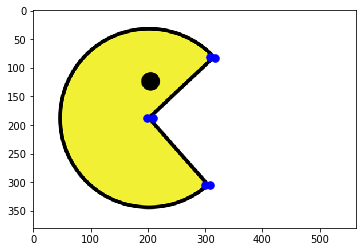

In [40]:
# parameters for ShiTomasi corner detection
feature_params = dict( maxCorners = 10,
                       qualityLevel = 0.2,
                       minDistance = 5,
                       blockSize = 5 )


# convert all frames to grayscale
gray_1 = cv2.cvtColor(frame_1, cv2.COLOR_RGB2GRAY)
gray_2 = cv2.cvtColor(frame_2, cv2.COLOR_RGB2GRAY)
gray_3 = cv2.cvtColor(frame_3, cv2.COLOR_RGB2GRAY)


# Take first frame and find corner points in it
pts_1 = cv2.goodFeaturesToTrack(gray_1, mask = None, **feature_params)

# display the detected points
plt.imshow(frame_1)
for p in pts_1:
    # plot x and y detected points
    plt.plot(p[0][0], p[0][1], 'b.', markersize=15)

# print out the x-y locations of the detected points
print(pts_1)

### Perform Optical Flow

Once we've detected keypoints on our initial image of interest, we can calculate the optical flow between this image frame (frame 1) and the next frame (frame 2), using OpenCV's calcOpticalFlowPyrLK which is documented in OpenCV. It takes in an initial image frame, the next image, and the first set of points, and it returns the detected points in the next frame and a value that indicates how good matches are between points from one frame to the next.

The parameters also include a window size and maxLevels that indicate the size of a window and mnumber of levels that will be used to scale the given images using pyramid scaling; this version peforms an iterative search for matching points and this matching criteria is reflected in the last parameter (you may need to change these values if you are working with a different image, but these should work for the provided example).

https://docs.opencv.org/trunk/dc/d6b/group__video__track.html#ga473e4b886d0bcc6b65831eb88ed93323

In [41]:
# parameters for lucas kanade optical flow
lk_params = dict( winSize  = (5,5),
                  maxLevel = 2,
                  criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))


# calculate optical flow between first and second frame
pts_2, match, err = cv2.calcOpticalFlowPyrLK(gray_1, gray_2, pts_1, None, **lk_params)

# Select good matching points between the two image frames
good_new = pts_2[match==1]
good_old = pts_1[match==1]

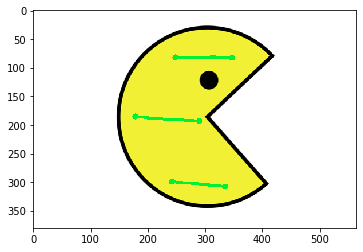

In [42]:
# create a mask image for drawing (u,v) vectors on top of the second frame
mask = np.zeros_like(frame_2)

# draw the lines between the matching points (these lines indicate motion vectors)
for i,(new,old) in enumerate(zip(good_new,good_old)):
    a,b = new.ravel()
    c,d = old.ravel()
    # draw points on the mask image
    mask = cv2.circle(mask,(a,b),5,(200),-1)
    # draw motion vector as lines on the mask image
    mask = cv2.line(mask, (a,b),(c,d), (200), 3)
    # add the line image and second frame together

composite_im = np.copy(frame_2)
composite_im[mask!=0] = [0]

plt.imshow(composite_im)

Next is Localization, it is all about finding out exactly where an object is in an environment and then tracking it over time as it moves (and in the case of a robot) as it gathers sensor measurements via camera, radar, LiDAR, or other sensors.

**Optical Flow Application**: https://blogs.nvidia.com/blog/2017/06/09/drone-navigates-without-gps/